# CNN for AED with Keras/TensorFlow

Date: February 29, 2019

Neural network: input MFCCs to DNN

## Preparing data set for CNN

In [29]:
DATASET_FOLDER = '../dataset/data_environment'

%run ../oscilloscope/script/dataset.py

ds = DataSet(DATASET_FOLDER)
train_data, train_labels, test_data, test_labels = ds.generate(flatten=False)
shape = ds.shape
class_labels = ds.class_labels

((420, 96, 12, 1), (180, 96, 12, 1))

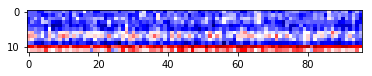

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(np.rot90(train_data[0].reshape(ds.shape)), cmap='seismic')
train_data.shape, test_data.shape

### CNN model

In [32]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(*shape, 1)))
model.add(layers.MaxPooling2D((4,2)))

model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((4,1)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(len(class_labels), activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 94, 10, 8)         80        
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 23, 5, 8)          0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 21, 3, 16)         1168      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 5, 3, 16)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 240)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 240)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 1446      
Total para

In [33]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

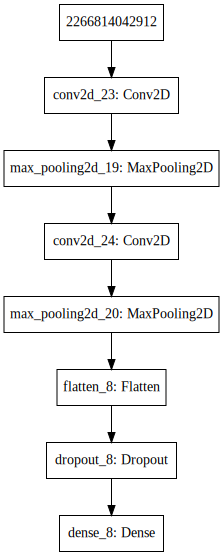

In [34]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

## Training CNN

In [35]:
EPOCHS = 100
history = model.fit(train_data, train_labels, epochs=EPOCHS, validation_data=(test_data, test_labels))

Train on 420 samples, validate on 180 samples
Epoch 1/100
420/420 [==============================] - 1s 2ms/step - loss: 1.8256 - acc: 0.2452 - val_loss: 1.5055 - val_acc: 0.4333
Epoch 2/100
420/420 [==============================] - 0s 485us/step - loss: 1.4605 - acc: 0.4452 - val_loss: 1.2447 - val_acc: 0.6333
Epoch 3/100
420/420 [==============================] - 0s 558us/step - loss: 1.2472 - acc: 0.5286 - val_loss: 1.0421 - val_acc: 0.7556
Epoch 4/100
420/420 [==============================] - 0s 490us/step - loss: 1.0624 - acc: 0.6214 - val_loss: 0.8645 - val_acc: 0.7444
Epoch 5/100
420/420 [==============================] - 0s 470us/step - loss: 0.9311 - acc: 0.6452 - val_loss: 0.7527 - val_acc: 0.7389
Epoch 6/100
420/420 [==============================] - 0s 499us/step - loss: 0.8282 - acc: 0.6786 - val_loss: 0.6354 - val_acc: 0.8333
Epoch 7/100
420/420 [==============================] - 0s 476us/step - loss: 0.7680 - acc: 0.6929 - val_loss: 0.5708 - val_acc: 0.8333
Epoch 8/100

Epoch 61/100
420/420 [==============================] - 0s 562us/step - loss: 0.1163 - acc: 0.9595 - val_loss: 0.0743 - val_acc: 0.9667
Epoch 62/100
420/420 [==============================] - 0s 562us/step - loss: 0.1109 - acc: 0.9548 - val_loss: 0.0797 - val_acc: 0.9778
Epoch 63/100
420/420 [==============================] - 0s 552us/step - loss: 0.0911 - acc: 0.9738 - val_loss: 0.0919 - val_acc: 0.9722
Epoch 64/100
420/420 [==============================] - 0s 569us/step - loss: 0.0938 - acc: 0.9643 - val_loss: 0.0842 - val_acc: 0.9667
Epoch 65/100
420/420 [==============================] - 0s 626us/step - loss: 0.1330 - acc: 0.9429 - val_loss: 0.0810 - val_acc: 0.9722
Epoch 66/100
420/420 [==============================] - 0s 618us/step - loss: 0.0882 - acc: 0.9667 - val_loss: 0.0678 - val_acc: 0.9667
Epoch 67/100
420/420 [==============================] - 0s 580us/step - loss: 0.1017 - acc: 0.9595 - val_loss: 0.0819 - val_acc: 0.9611
Epoch 68/100
420/420 [==========================

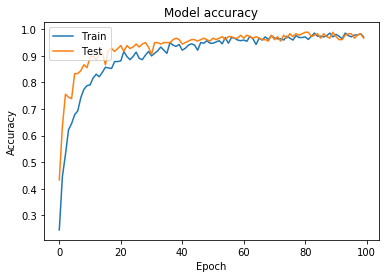

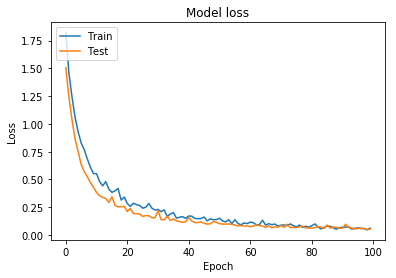

In [36]:
%run history.py
%matplotlib inline

plot_accuracy(history)
plot_loss(history)

## Save the model

In [37]:
import datetime

dt = datetime.datetime.today().strftime('%Y%m%d%H%M%S')
filename = DATASET_FOLDER + '/cnn_mfcc_for_aed_{}.h5'.format(dt)
model.save(filename)

## Load the model

In [38]:
del model
model = models.load_model(filename)

## Confirmation

In [39]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
layer_outputs = [layer.output for layer in model.layers]
#layer_outputs

In [41]:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(test_data)
#activations[0][0,:,:,0].shape

In [42]:
class_labels

['train', 'station', 'cafe', 'mall', 'port', 'street']

In [43]:
(activations[-1][:10]*100).astype(int)

array([[  0,   0,   0, 100,   0,   0],
       [ 99,   0,   0,   0,   0,   0],
       [  0,   5,  83,  11,   0,   0],
       [  0,   0, 100,   0,   0,   0],
       [  1,  98,   0,   0,   0,   0],
       [  0,   0,   0,  99,   0,   0],
       [  0,  99,   0,   0,   0,   0],
       [ 97,   2,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  99],
       [ 96,   0,   0,   0,   0,   3]])

In [44]:
test_labels[:10].astype(int)

array([[0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0]])